In [5]:
#basic_college_football_stats.csv

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# import data
data = pd.read_csv('../data/raw/basic_college_football_stats.csv')

In [8]:
# define function
def create_team_conference_df(df: pd.DataFrame) -> pd.DataFrame:
    '''
    this function takes a dataframe with team names and conference names and separates it into columns
    for future mapping
    input: pd.DataFrame
    output: pd.DataFrame
    '''
    # create new dataframe, select team column
    team_conference = pd.DataFrame(df['Team']) 
    
    # create blank dataframe
    team_conference_split = pd.DataFrame()
    
    # split team & conference
    team_conference_split = team_conference['Team'].str.rsplit(pat=' (', n=1, expand=True)
    
    # rename columns
    team_conference_split.columns = ['team_name', 'conference_name']
    
    # string improvement: replace the closing parenthesis, lowercase
    team_conference_split['conference_name'] = team_conference_split['conference_name'].str.replace(')', '', n=1)
    team_conference_split['conference_name']=team_conference_split['conference_name'].str.lower()
    team_conference_split['team_name']=team_conference_split['team_name'].str.lower()

    return team_conference_split

    
    

In [9]:
#call function
team_conference = create_team_conference_df(data)

In [10]:
team_conference

,team_name,conference_name
0,tennessee,sec
1,washington,pac-12
2,southern california,pac-12
3,ucla,pac-12
4,georgia,sec
...,...,...
126,rutgers,big ten
127,colorado,pac-12
128,massachusetts,fbs independent
129,iowa,big ten


In [11]:
team_conference['team_name_matched'] = team_conference['team_name'].replace({'southern california': 'usc', 'ole miss': 'mississippi', 'boston college': 'boston col.'
    ,'nc state': 'north carolina st.', 'ucf': 'central florida', 'central mich.': 'central michigan',
        'eastern mich.':  'eastern michigan'
        })


In [12]:
# check value counts
team_conference['conference_name'].value_counts()

conference_name
sec                14
big ten            14
acc                14
sun belt           14
pac-12             12
mac                12
mountain west      12
c-usa              11
aac                11
big 12             10
fbs independent     7
Name: count, dtype: int64

In [13]:
#team_conference['team_name'].unique()

In [17]:
null_conference_name = merge_table[pd.isnull(merge_table['conference_name'])]

In [18]:
null_conference_name_ranked=null_conference_name['college'].value_counts()

In [19]:
merge_table['college'].value_counts()


college
usc                            64
miami (fl)                     63
penn st.                       62
notre dame                     60
michigan                       56
                               ..
east mississippi cctroy         1
columbia                        1
georgia militaryflorida         1
utahbaylor                      1
wisconsinnorth carolina st.     1
Name: count, Length: 442, dtype: int64

In [20]:
#merge_table['college'].unique()


In [21]:
team_conference[['team_name']].sort_values(by='team_name')

,team_name
58,air force
79,akron
10,alabama
25,app state
19,arizona
...,...
56,west virginia
6,western ky.
124,western mich.
90,wisconsin


In [22]:
top_50_list = merge_table['college'].value_counts().index[:50].to_list()
top_50_list

['usc',
 'miami (fl)',
 'penn st.',
 'notre dame',
 'michigan',
 'lsu',
 'tennessee',
 'ucla',
 'georgia',
 'ohio st.',
 'colorado',
 'florida st.',
 'oklahoma',
 'oregon',
 'alabama',
 'washington',
 'nebraska',
 'florida',
 'michigan st.',
 'texas a&m',
 'north carolina',
 'clemson',
 'purdue',
 'pittsburgh',
 'illinois',
 'byu',
 'arizona st.',
 'boston col.',
 'stanford',
 'california',
 'texas',
 'auburn',
 'wisconsin',
 'iowa',
 'tcu',
 'syracuse',
 'rutgers',
 'kansas',
 'minnesota',
 'maryland',
 'virginia',
 'arkansas',
 'louisville',
 'south carolina',
 'texas tech',
 'utah',
 'oklahoma st.',
 'smu',
 'cincinnati',
 'mississippi']

In [23]:
null_conference_name['college'].value_counts()[:50]

college
florida a&m                 17
grambling st.               16
southern miss               13
tennessee st.               13
jackson st.                 11
western illinois            11
idaho                       11
texas southern               9
south dakota st.             9
south carolina st.           9
texas-arlington              9
alcorn st.                   8
texas a&m-commerce           8
northwestern st. (la)        8
southern                     8
brown                        8
texas-el paso                7
md-eastern shore             7
west texas a&m               7
south florida                7
cal poly-san luis obispo     7
morgan st.                   7
ark-pine bluff               7
texas a&m-kingsville         7
western carolina             7
weber st.                    6
alabama a&m                  6
rhode island                 6
north dakota st.             6
fort valley st.              6
villanova                    5
colgate                      5


In [24]:
#team_conference.loc[~team_conference['team_name'].isin(top_50_list)]

In [25]:
team_conference.columns

Index(['team_name', 'conference_name', 'team_name_matched'], dtype='object')

In [26]:
# 'southern california', 'usc'
# 'ole miss', 'mississippi'
# 'boston college', 'boston col.'
# 'nc state', 'north carolina st.'
# 'ucf', 'central florida'
# 'central mich.', 'central michigan'
# 'eastern mich.', 'eastern michigan'


#not on the list:
#from rosters:
#idaho: Big Sky Conference

In [ ]:
#merge_table_2 = pd.merge(
#    team_conference, data_rosters,
#    left_on='team_name', right_on='college',
#    how='left', suffixes=('_left', '_right')
#)

In [ ]:
#merge_table_2_b=merge_table_2[['team_name','conference_name','college']]

In [ ]:
#null_conference_name_conf = merge_table_2_b[pd.isnull(merge_table_2_b['college'])]

In [ ]:
#null_conference_name_conf

In [2]:
import pandas as pd
import numpy as np

## data input

## part iii: Visualization

### data prep

In [11]:
# import data
merge_table = pd.read_csv('../data/cleaned/all_superbowl_winning_rosters.csv')

# Define a function to calculate the decade
def get_decade(year):
    return str(year)[:3] + "0s"

# Apply the function to add the decade column
merge_table['decade'] = merge_table['year'].apply(get_decade)

#### Counts & ranking WIP

In [196]:
# create counts & ranking for colleges by decade

# Create a helper column that represents the count of each conference within each decade
merge_table['count_coll_d'] = merge_table.groupby(['decade', 'college']).transform('size')

# Sort the DataFrame by the count_c_d column in descending order
merge_table = merge_table.sort_values(['decade','count_coll_d'], ascending=[False,False])

# Rank the count column within each decade
merge_table['rank_coll_d'] = merge_table.groupby('decade')['count_coll_d'].rank(method='min')

In [ ]:
merge_table[['year','team','player','college','count_coll_d','rank_coll_d']].sort_values(['year','count_coll_d','college'], ascending=[True,True,True])

In [44]:
# create counts & ranking for conferences by decade

# Create a helper column that represents the count of each conference within each decade
merge_table['count_conf_d'] = merge_table.groupby(['decade', 'conference_name']).transform('size')

# Sort the DataFrame by the count_c_d column in descending order
merge_table = merge_table.sort_values(['count_conf_d'], ascending=[False])

# Rank the count column within each decade
merge_table['rank_conf_d'] = merge_table.groupby('decade')['count_coll_d'].rank(method='min')

#### Agg College and Conference table

In [45]:
# create table with player counts grouped by decade, conf name and college name
agg_table = merge_table.groupby(['decade','conference_name','college','team']).agg({'player': 'count'})
agg_table.reset_index(inplace=True)
agg_table.rename(columns={'player': 'player_count'}, inplace=True)

#### College table

In [46]:
#create summary table with player counts by college and decade

college_table = agg_table.groupby(['decade','college']).agg({'player_count': 'sum'}).reset_index()

In [47]:
college_table.describe()

,player_count
count,563.000000
mean,4.239787
std,3.515251
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,19.000000


#### Conference table

In [33]:
#create summary table with player counts by conference and decade

conference_table = agg_table.groupby(['decade','conference_name']).agg({'player_count': 'sum'}).reset_index()

#conference_decade

In [34]:
conferences_per_decade = pd.DataFrame(conference_table.groupby('decade')['conference_name'].nunique().reset_index())
conferences_per_decade.rename(columns={'conference_name': 'conference_count'}, inplace=True)
conferences_per_decade

,decade,conference_count
0,1960s,9
1,1970s,10
2,1980s,10
3,1990s,11
4,2000s,11
5,2010s,11
6,2020s,11


In [ ]:
import seaborn as sns
sns.swarmplot(x = merge_table.loc[merge_table['decade'] == '1990s']['team'], y = merge_table['conference_name'])

In [ ]:
import seaborn as sns
sns.stripplot(x = merge_table['years_in_league'], y = merge_table['decade'])

In [ ]:
import seaborn as sns
sns.countplot(merge_table['college'])

In [218]:
data_filtered.columns

Index(['year', 'team', 'no.', 'player', 'age', 'position', 'games_played',
       'games_started', 'weight', 'height', 'college', 'date_of_birth',
       'years_in_league', 'approx_value', 'drafted_(tm/rnd/pick/yr)',
       'player_additional', 'salary', 'drafted_team/undrafted',
       'drafted_round', 'drafted_pick', 'drafted_year', 'conference_name',
       'decade', 'count_coll_d', 'count_conf_d', 'rank_coll_d', 'rank_conf_d'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for decade in merge_table['decade'].unique():
    data_filtered = merge_table[merge_table['decade'] == decade]
    sns.countplot(data=data_filtered, x='conference_name')
    plt.title(f'Countplot for Decade: {decade}')
    plt.show()
    


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for decade in merge_table['decade'].unique():
    data_filtered = merge_table[merge_table['decade'] == decade]
    sns.countplot(data=data_filtered, x='college')
    plt.title(f'Countplot for Decade: {decade}')
    plt.show()

In [ ]:
sns.distplot(college_table_above_25p['college'])
plt.show()

In [199]:
college_table_above_25p[college_table_above_25p['decade'] == '1970s']

,decade,college,player_count
71,1970s,georgia,7
81,1970s,louisiana tech,7
87,1970s,michigan,10
88,1970s,michigan st.,8
98,1970s,notre dame,13
99,1970s,ohio st.,7
103,1970s,penn st.,14
120,1970s,usc,16


### Charts: College

In [26]:
# describe spread of data (how many colleges contributed to winning teams per decade)

In [119]:
college_table

,decade,college,player_count
0,1960s,alabama,6
1,1960s,arizona st.,2
2,1960s,auburn,2
3,1960s,boston col.,2
4,1960s,buffalo,1
...,...,...,...
558,2020s,wake forest,1
559,2020s,washington,8
560,2020s,washington st.,1
561,2020s,wisconsin,4


In [35]:
colleges_per_decade = pd.DataFrame(college_table.groupby('decade')['college'].nunique().reset_index())
colleges_per_decade.rename(columns={'college': 'college_count'}, inplace=True)
colleges_per_decade

,decade,college_count
0,1960s,53
1,1970s,77
2,1980s,87
3,1990s,83
4,2000s,93
5,2010s,99
6,2020s,71


In [36]:
colleges_per_decade #try distinct college?

,decade,college_count
0,1960s,53
1,1970s,77
2,1980s,87
3,1990s,83
4,2000s,93
5,2010s,99
6,2020s,71


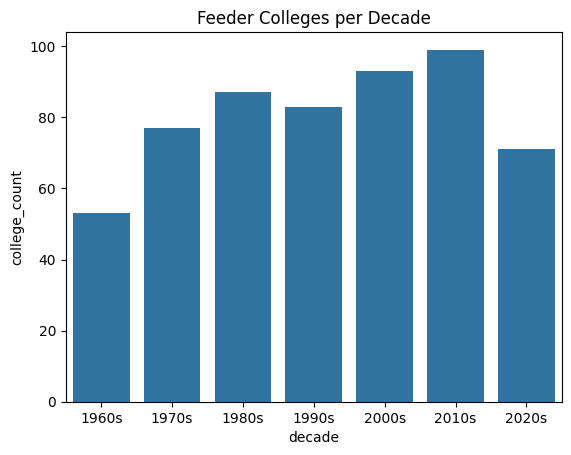

In [118]:
    sns.barplot(data=colleges_per_decade, y='college_count', x='decade')
    plt.title(f'Feeder Colleges per Decade')
    ax.bar_label(ax.containers[0])
    plt.show()

# Comments on Feeder Colleges per Decade: considering decates with full data (1970s to 2010s) we can observe an increase of over 28% from
# 77 feeder colleges in 1970s to 99 feeder colleges in 2010s. This suggests the pool of feeder colleges to
# NFL Superbowl winning teams has increased over time. It could also mean that a bigger variety of teams
# have won the superbowl each decade.


In [50]:
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

#### Winning teams with multiple players from same colleges (over n)

In [141]:
# Adding YEAR
# create table with player counts grouped by decade, conf name and college name

player_count_college_year = merge_table.groupby(['decade','year','team','conference_name','college']).agg({'player': 'count'})
player_count_college_year.reset_index(inplace=True)
player_count_college_year.rename(columns={'player': 'player_count'}, inplace=True)

In [142]:
# filtered dataframe where winning team has a minimum of n players from same college
min_same_college_player_num=3
player_count_college_year_filtered = player_count_college_year[player_count_college_year['player_count']>=min_same_college_player_num]

In [143]:
# df showing year and winning team, with number of player_colleges 
# from which a min of n players came from at the time of the winning year

player_count_college_year_summary = player_count_college_year_filtered.groupby(['year','team']).agg({'college': ['count', 'unique']})
player_count_college_year_summary.reset_index(inplace=True)
player_count_college_year_summary.rename(columns={'college': 'college_count'}, inplace=True)

In [ ]:
    sns.barplot(data=player_count_college_year_summary, y='year', x='count')
    plt.title(f'Feeder Colleges per Decade')
    plt.show()

In [151]:
# fix column names:
player_count_college_year_summary.columns = player_count_college_year_summary.columns.droplevel(0)
player_count_college_year_summary.columns = ['year', 'team', 'college_count', 'college_names']


In [165]:
player_count_college_year_summary.describe()

,year,college_count
count,45.000000,45.000000
mean,1999.200000,2.555556
std,14.504858,1.235011
min,1968.000000,1.000000
25%,1989.000000,2.000000
50%,2000.000000,2.000000
75%,2011.000000,3.000000
max,2022.000000,6.000000


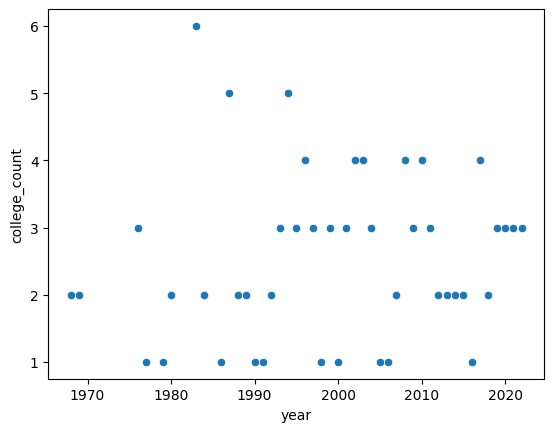

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=player_count_college_year_summary, y='college_count', x='year')
plt.show()

In [153]:
player_count_college_year_summary

# Comments on feeder colleges contribution using  minimum contribution of 3 players:
# Having a mean of 2.5 colleges contributing more than 3 players each to the winning team per year,
# it seems a typical occurence that NFL winning teams have multiple groups of players that come from the same college,
# potentially increasing the team's overall cohesion as they have possibly had more years or experience playing together


,year,team,college_count,college_names
0,1968,newyorkj,2,"[texas, michigan st.]"
1,1969,kansas,2,"[michigan st., minnesota]"
2,1976,oakland,3,"[nebraska, ohio st., usc]"
3,1977,dallas,1,[stanford]
4,1979,pittsburgh,1,[penn st.]
5,1980,oakland,2,"[colorado, usc]"
6,1983,oakland,6,"[oklahoma, nebraska, penn st., colorado, ucla,..."
7,1984,sanfrancisco,2,"[oregon, ucla]"
8,1986,newyork,1,[notre dame]
9,1987,washington,5,"[clemson, miami (fl), north carolina, maryland..."


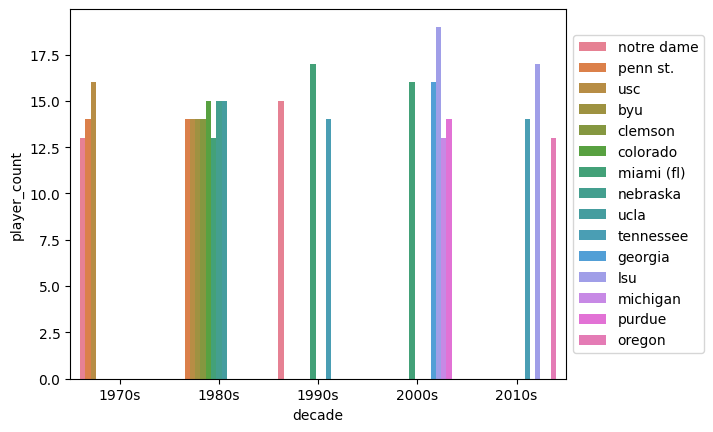

In [97]:
    # calculate selected quantile for number of players per coll.
    quantile_conf=.95
    quantile_value_coll= college_table['player_count'].quantile(q=quantile_conf)
    
    # create filtered dataframe based on selected quantile
    coll_table_above_quantile = college_table[college_table['player_count'] > quantile_value_coll]

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=coll_table_above_quantile, x='decade', y='player_count', hue='college')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [182]:
t_college_table = college_table.copy()

In [183]:
type(t_college_table)

pandas.core.frame.DataFrame

In [190]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [194]:
# College ranking per decade
t_college_table['player_count_rank'] = t_college_table.groupby(['decade'])['player_count'].rank(method='min', ascending=False)
t_college_table_sorted = t_college_table.sort_values(['decade','player_count_rank'], ascending=True)
t_college_table_sorted[t_college_table_sorted['player_count_rank']==1]

,decade,college,player_count,player_count_rank
25,1960s,michigan st.,8,1.0
120,1970s,usc,16,1.0
143,1980s,colorado,15,1.0
172,1980s,nebraska,15,1.0
205,1980s,ucla,15,1.0
254,1990s,miami (fl),17,1.0
337,2000s,lsu,19,1.0
432,2010s,lsu,17,1.0
559,2020s,washington,8,1.0


In [ ]:
## Comments on top feeder colleges per decade:
# for decades with full yearly data, it can be observed that in 1970s the top colleges contributed 16 players
# to the decade's winning teams, whereas in 2010s this number was 17. Most Decade-feeder colleges appear only
# once in the list excep for LSU, being the top college for two decades in a row.

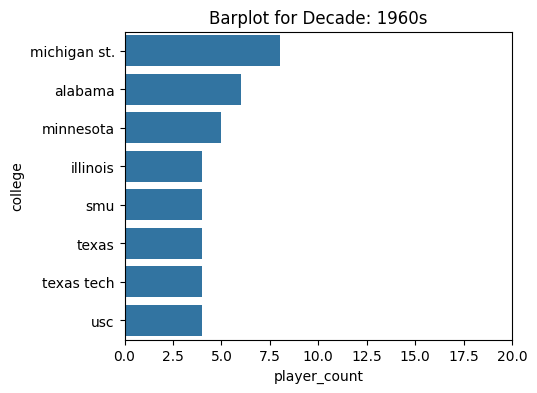

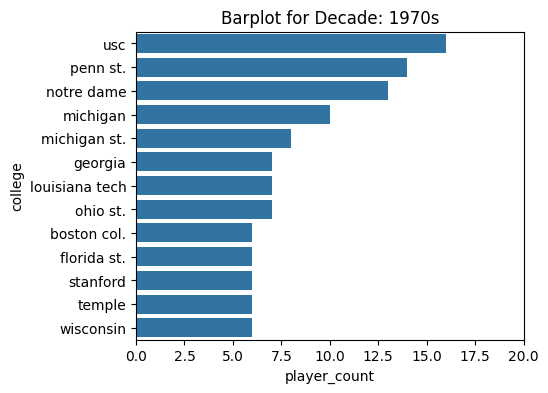

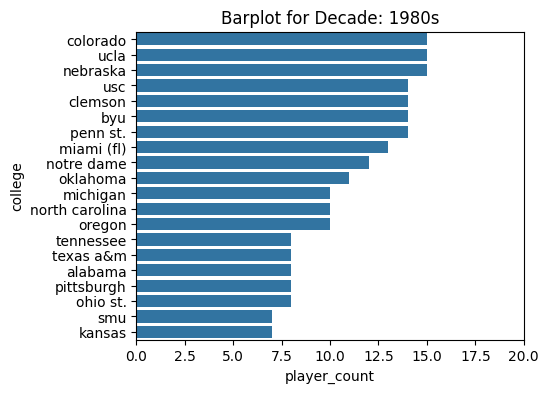

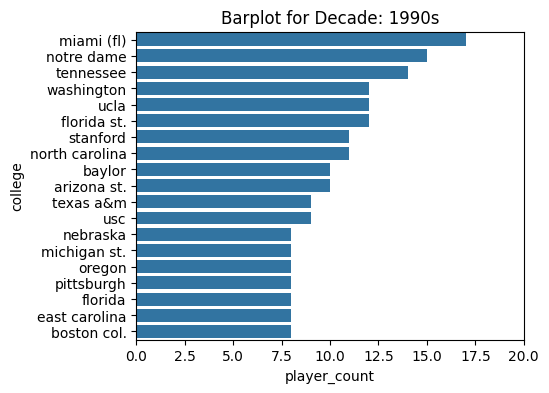

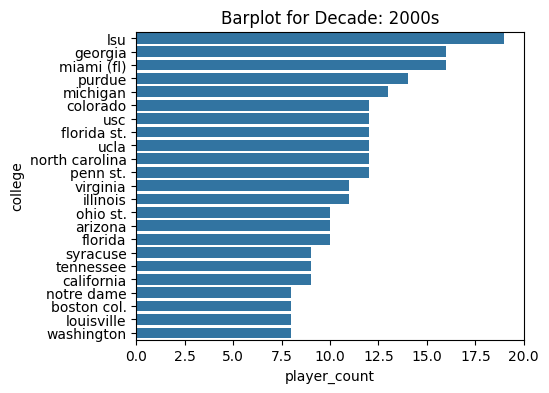

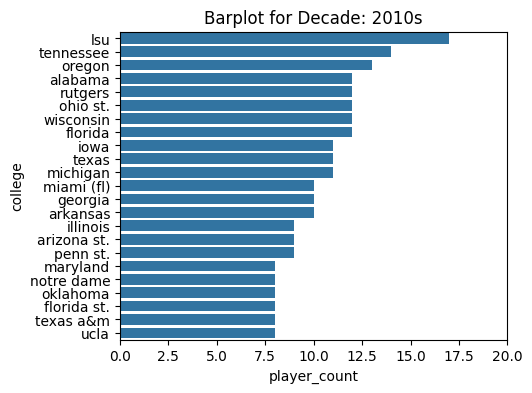

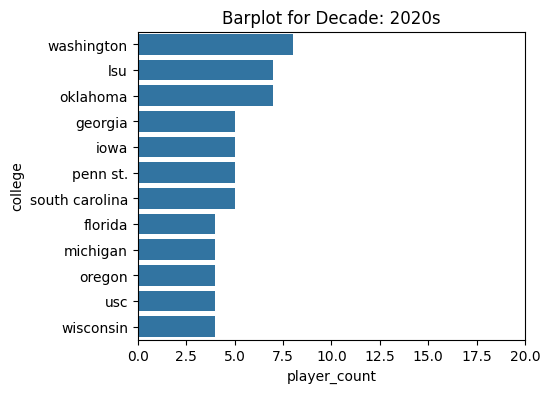

In [213]:
# Visualization: feeder top colleges by decade 
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

for decade in decade_order:
    fig, ax = plt.subplots(figsize=(5, 4))
    # create df of selected decade
    data_decade = college_table[college_table['decade'] == decade]
    
    # calculate selected quantile for number of players per college
    quantile=0.75
    quantile_value = data_decade['player_count'].quantile(q=quantile)
    
    # create filtered dataframe based on selected quantile
    college_table_above_quantile = college_table[college_table['player_count'] > quantile_value]
    data_sorted= college_table_above_quantile[college_table_above_quantile['decade'] == decade].sort_values('player_count', ascending=False)
    
    #create barplot
    sns.barplot(data=data_sorted, y='college', x='player_count')
    ax.set_xlim([0, 20])
    plt.title(f'Barplot for Decade: {decade}')
    plt.show()

Coments:
These barplots show the top 10% of feeder colleges to Superbowl winning teams per decade
Colleges feed players into the NFL through drafts and other transactions.




### Charts: Conferences

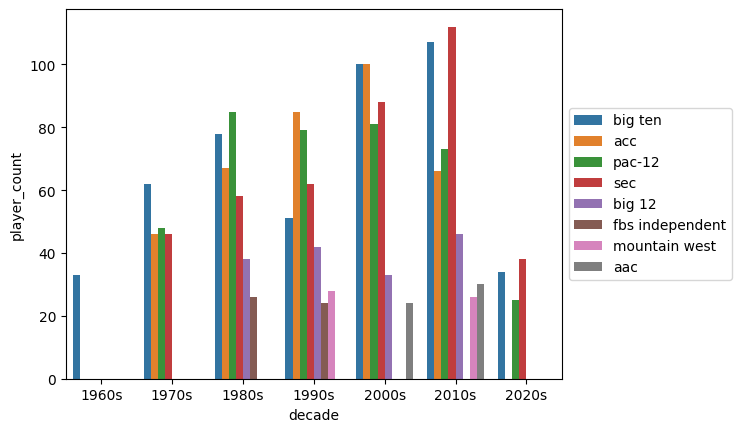

In [214]:
    # calculate selected quantile for number of players per conference
    quantile_conf=.5 
    quantile_value_conf= conference_table['player_count'].quantile(q=quantile_conf)
    
    # create filtered dataframe based on selected quantile
    conf_table_above_quantile = conference_table[conference_table['player_count'] > quantile_value_conf]

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=conf_table_above_quantile, x='decade', y='player_count', hue='conference_name')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Comments:
taking only the conferences that contributed more than the 70 Percentile winning-team players per decade
we can observe this is a relatively small group and also relatively stable.
There is a growing trend in the conference 'big ten' that is visible from 1970s to 2010s
Whereas in 2010s the top conference was 'sec', after increasing its contribution decade over decade since the 1970s.
Others, such as 'pac-12' have experienced relative stability over the decades 1980s through 2010s, but seemingly on a decreasing trend.


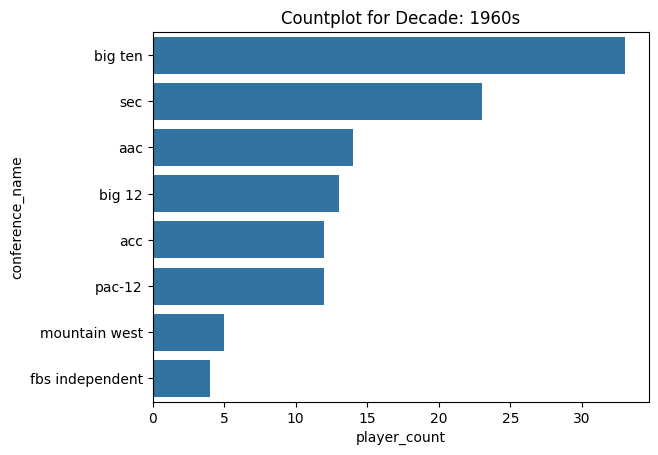

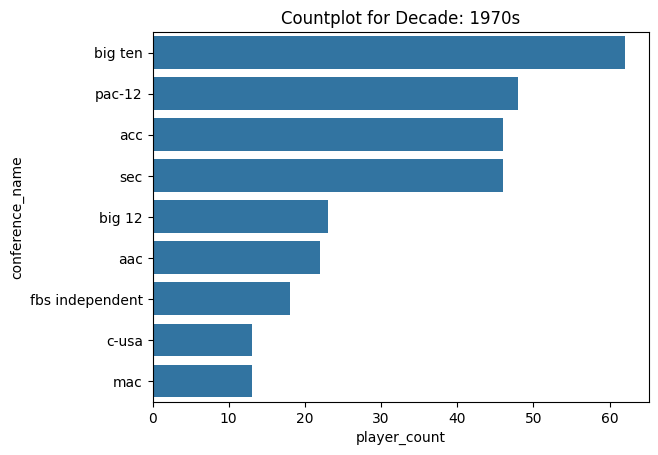

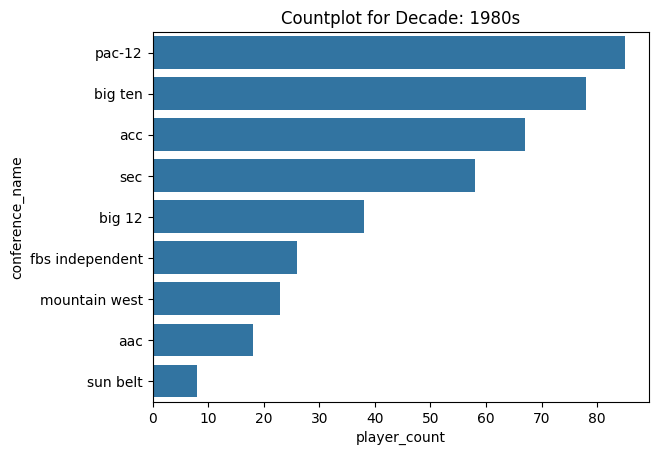

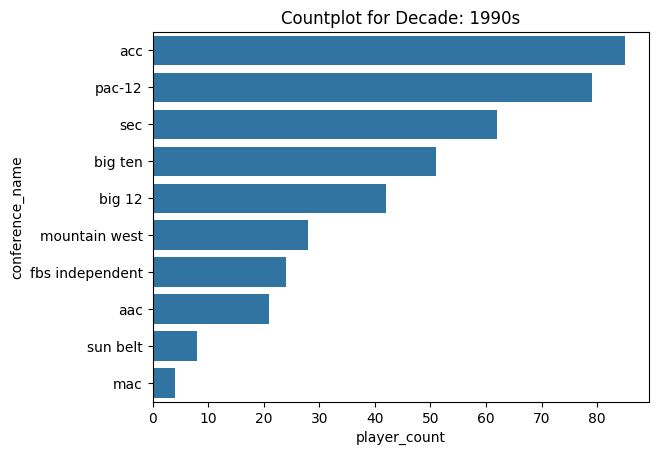

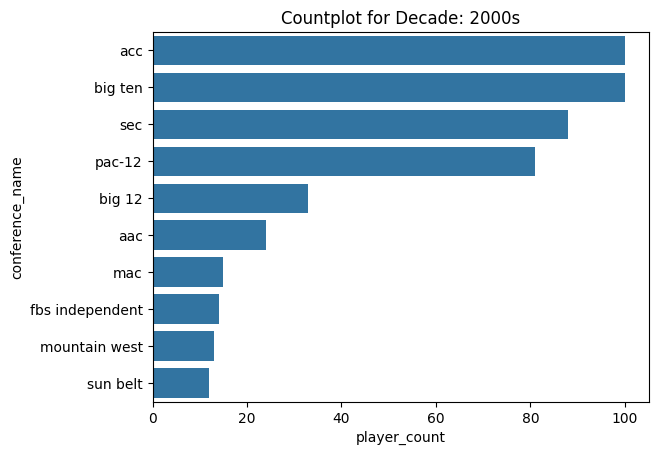

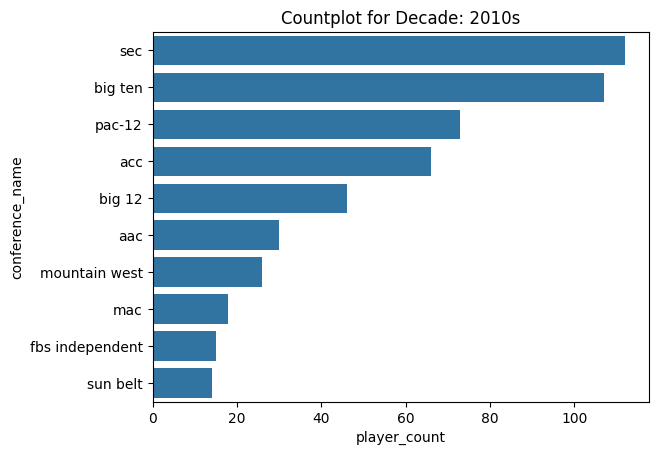

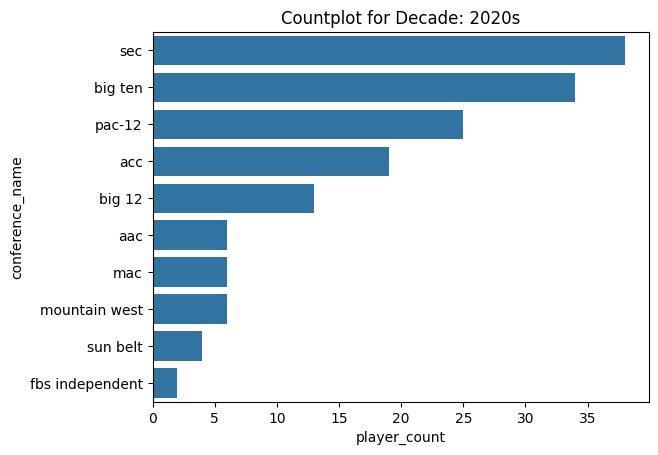

In [206]:
# Visualization: feeder top conferences by decade 

import seaborn as sns
import matplotlib.pyplot as plt
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

for decade in decade_order:
    
    # create df of selected decade
    data_decade = conference_table[conference_table['decade'] == decade]
    
    # calculate selected quantile for number of players per conference
    quantile=0
    quantile_value = data_decade['player_count'].quantile(q=quantile)
    
    # create filtered dataframe based on selected quantile
    conf_table_above_quantile = conference_table[conference_table['player_count'] > quantile_value]
    
    data_sorted= conf_table_above_quantile[conf_table_above_quantile['decade'] == decade].sort_values('player_count', ascending=False)
    sns.barplot(data=data_sorted, y='conference_name', x='player_count')
    plt.title(f'Countplot for Decade: {decade}')
    plt.show()